# First attempt at downloading all scrobbled songs from LastFM and formatting them

Aim of attempt 1 is to get a formatted pandas dataframe of information to be refactored later
Initial Requirements are:
Song name
Artist name
Date and time of song playing

First try and get the first page of the above.
Then work on expanding.

Later requirements will login, error check and be parameterised so it works for other users.

## To-do list


- (done) Get cleaner artist and timestamp scrape 
- Loop over all last fm songs
- (done) Remove song titles after "-" as it is normally something like "remastered" 
- Get better time stamp format
- Get time between songs and flag skipped songs
- Make some generic time features (time of day, weekend etc.)
- Bring in metadata for songs

## Install Packages

In [54]:
import re           # regular expressions
import requests     # request web pages
import bs4          # 'beautiful soup 4' - find elements within HTML
import lxml         # HTML parser
import pandas as pd # allows making dataframes of results
import numpy as np

In [10]:
# Define variables for the page we want to look at and the HTML class of the elements we want
page = 'https://www.bbc.co.uk/news'
link_class = 'gs-u-pl-@xs'

In [11]:
# Request the page, check it is valid and parse.
res = requests.get(page)
print(res.raise_for_status())                 # returns error if page not found

None


In [12]:
soup = bs4.BeautifulSoup(res.text, "lxml")   # parse HTML with lxml processor

<!DOCTYPE html>
<html class="b-pw-1280 no-touch" id="responsive-news" lang="en-GB">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1, user-scalable=1" name="viewport"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="Tk6bx1127nACXoqt94L4-D-Of1fdr5gxrZ7u2Vtj9YI" name="google-site-verification"/>
<link crossorigin="" href="//static.bbc.co.uk" rel="preconnect"/>
<link crossorigin="" href="//m.files.bbci.co.uk" rel="preconnect"/>
<link crossorigin="" href="//nav.files.bbci.co.uk" rel="preconnect"/>
<link crossorigin="" href="//ichef.bbci.co.uk" rel="preconnect"/>
<link href="//mybbc.files.bbci.co.uk" rel="dns-prefetch"/>
<link href="//ssl.bbc.co.uk/" rel="dns-prefetch"/>
<link href="//sa.bbc.co.uk/" rel="dns-prefetch"/>
<link href="//ichef.bbci.co.uk" rel="dns-prefetch"/>
<link as="style" href="//m.files.bbci.co.uk/modules/bbc-morph-news-page-styles/2.0.9/enhanced.css" rel="preload"/>
<script type="text/javascript">
          
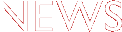

In [6]:
soup

In [13]:
# Create an empty list to store the article titles, then look through the HTML for them
top_ten_titles = []
for item in soup.find_all("a", {"class" : link_class}):
    top_ten_titles.append(item.text)

print(top_ten_titles)

["Dubai ruler's wife 'in hiding in UK'", "New MEP 'asked to leave' European Parliament", 'First woman nominated to lead EU Commission', 'Man jailed for shooting great-grandson dead', 'Who is Merkel ally Von der Leyen?', "Nike loses aid as 'racist trainer' row intensifies", "Dalai Lama 'deeply sorry' for remarks about women", 'Ball, Winkleman and Feltz among top BBC earners', 'Underwater vessel fire kills 14 Russian sailors', "MPs 'staggered' by NHS fines 'complacency'"]


In [14]:
# can I make top ten titles a data frames?

In [15]:
bbc = pd.DataFrame(top_ten_titles, columns=['headline'])

In [16]:
bbc.head()

headline
0          Dubai ruler's wife 'in hiding in UK'
1  New MEP 'asked to leave' European Parliament
2   First woman nominated to lead EU Commission
3   Man jailed for shooting great-grandson dead
4             Who is Merkel ally Von der Leyen?

In [134]:
# this is for the last page
lastfm = 'https://www.last.fm/user/rosiedempsey93/library?date_preset=ALL&page=2'

In [42]:
# Request the page, check it is valid and parse.
last_res = requests.get(lastfm)
print(last_res.raise_for_status())                 # returns error if page not found

None


In [43]:
last_soup = bs4.BeautifulSoup(last_res.text, "lxml")

In [132]:
# This get's song titles only
titles_scrape = []
for item in last_soup.find_all("a",{"class":"link-block-target"}):
    titles_scrape.append(item.text.partition("-")[0])

print(titles_scrape)

['Orgasm Addict ', 'Perfect 10', 'Bill McCai', 'She Bangs The Drums ', "Tony's Theme", 'Delivery', 'Get On Our Own ', 'Pepper', 'Levitate Me', 'Ladykillers', 'Born in the U.S.A.', 'Novocaine for the Soul', 'Where Is My Mind?', "It's A Shame About Ray ", 'Back on the Chain Gang ', 'Velouria', 'Faint', 'Welcome To The Working Week', 'No. 13 Baby', 'Pass It On', 'Where You Get Love', 'Phantom Limb', 'Gigantic', 'Pounding', 'Time for Heroes', 'Rescue', 'La La Love You', 'Music When the Lights Go Out', 'White Limo', 'Happy Hour', 'Got the Life', 'Debaser', 'What Katie Did', 'Kingdom of Rust', 'Anyone Can Play Guitar', 'Freak Scene', 'Fuckabout', 'Numb', 'Rise ', 'Mote', 'Popular', 'Hybrid Moments', 'Saturn 5', 'Get Up Off Our Knees', 'Hey Man Nice Shot', 'Frankly, Mr. Shankly ', "Don't Get Me Wrong ", 'Kundalini Express', 'The People Who Grinned Themselves To Death', 'Not If You Were The Last Junkie On Earth']


In [125]:
# This get's song time stamp in a slightly messy format messes up with latest songs as it takes "hours ago"
time_scrape = []
for item in last_soup.find_all("td",{"class":"chartlist-timestamp"}):
    time_scrape.append(item.text.replace("\n", ""))

print(time_scrape)
# gets time :-) 

['1 Jul 5:21pm', '1 Jul 5:17pm', '1 Jul 5:15pm', '1 Jul 5:11pm', '1 Jul 4:19pm', '1 Jul 4:16pm', '1 Jul 4:12pm', '1 Jul 4:07pm', '1 Jul 4:05pm', '1 Jul 4:01pm', '1 Jul 3:57pm', '1 Jul 3:54pm', '1 Jul 3:50pm', '1 Jul 3:47pm', '1 Jul 3:43pm', '1 Jul 3:39pm', '1 Jul 3:36pm', '1 Jul 3:34pm', '1 Jul 3:30pm', '1 Jul 3:28pm', '1 Jul 3:24pm', '1 Jul 3:20pm', '1 Jul 3:16pm', '1 Jul 3:11pm', '1 Jul 3:08pm', '1 Jul 3:04pm', '1 Jul 3:01pm', '1 Jul 2:58pm', '1 Jul 2:54pm', '1 Jul 2:52pm', '1 Jul 2:48pm', '1 Jul 2:45pm', '1 Jul 2:42pm', '1 Jul 2:20pm', '1 Jul 2:17pm', '1 Jul 2:13pm', '1 Jul 2:09pm', '1 Jul 2:06pm', '1 Jul 1:59pm', '1 Jul 1:51pm', '1 Jul 1:47pm', '1 Jul 1:45pm', '1 Jul 1:41pm', '1 Jul 1:37pm', '1 Jul 1:32pm', '1 Jul 1:30pm', '1 Jul 1:26pm', '1 Jul 1:20pm', '1 Jul 1:17pm', '1 Jul 1:13pm']


In [129]:
# date time doesn't come with year! Need to concatenate year on 
# I guess add current year at time of scrape, not perfect but would do
from datetime import datetime
# 1 Jul 5:21pm 
# "%d %mmm %H:%Mpm"
# datetimeObj = datetime.strptime('2018-09-11T15::11::45.456777', '%Y-%m-%dT%H::%M::%S.%f')
datetimeObj = datetime.strptime('20191 Jul 5:21pm', "%Y%d %b %H:%Mpm")
print(datetimeObj)
print(type(datetimeObj))

2019-07-01 05:21:00
<class 'datetime.datetime'>


In [123]:
# Finds artist and song with - between and messy format
artist_song_scrape = []
for item in last_soup.find_all("td",{"class":"chartlist-name"}):
    artist_song_scrape.append(item.text.replace("\n", "").partition("—")[0])

print(artist_song_scrape)
# gets song and name, probably a nice class like the one that gets just artists!

['Buzzcocks ', 'The Beautiful South ', 'The Coral ', 'The Stone Roses ', 'Pixies ', 'Babyshambles ', 'Buzzcocks ', 'Butthole Surfers ', 'Pixies ', 'Lush ', 'Bruce Springsteen ', 'Eels ', 'Pixies ', 'The Lemonheads ', 'Pretenders ', 'Pixies ', 'Linkin Park ', 'Elvis Costello ', 'Pixies ', 'The Coral ', 'Matthew Sweet ', 'The Shins ', 'Pixies ', 'Doves ', 'The Libertines ', 'Echo & the Bunnymen ', 'Pixies ', 'The Libertines ', 'Foo Fighters ', 'The Housemartins ', 'Korn ', 'Pixies ', 'The Libertines ', 'Doves ', 'Radiohead ', 'Dinosaur Jr. ', 'Drenge ', 'Linkin Park ', 'Public Image Ltd. ', 'Sonic Youth ', 'Nada Surf ', 'Misfits ', 'Inspiral Carpets ', 'The Housemartins ', 'Filter ', 'The Smiths ', 'Pretenders ', 'Love And Rockets ', 'The Housemartins ', 'The Dandy Warhols ']


In [133]:
# makes data frame of scrapes that align 
scrape_df = pd.DataFrame(np.column_stack([artist_song_scrape, titles_scrape, time_scrape]), 
                               columns=['artist_song', 'song', 'time'])
scrape_df.tail()

artist_song                                        song  \
45         The Smiths                        Frankly, Mr. Shankly    
46         Pretenders                          Don't Get Me Wrong    
47   Love And Rockets                            Kundalini Express   
48   The Housemartins   The People Who Grinned Themselves To Death   
49  The Dandy Warhols     Not If You Were The Last Junkie On Earth   

            time  
45  1 Jul 1:30pm  
46  1 Jul 1:26pm  
47  1 Jul 1:20pm  
48  1 Jul 1:17pm  
49  1 Jul 1:13pm

In [101]:
# find maximum page
def find_max_page():
    pages_list = []
    for item in last_soup.find_all("li",{"class":"pagination-page"}):
        try:
            pages_list.append(int(item.text.strip('\n')))
        except ValueError:
            pass
    return max(pages_list)

In [103]:
max_page = find_max_page()
max_page

46

In [ ]:
# loop through pages from 0 to max_page
# make a list from 0 to make page

In [139]:
web_pages = []
for i in range(2,max_page+1):
    web_pages.append(i)
print(web_pages)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]


In [203]:
# gets a list of all pages we want - can we iterate over them all?
def webIterate():
    web_pages = []
    base_link = "https://www.last.fm/user/rosiedempsey93/library?date_preset=ALL&page="
    for i in range(2,6):
        web_pages.append(base_link+str(i))
    return web_pages
last_fm_pages = webIterate()
print(last_fm_pages)
# max_page+1

['https://www.last.fm/user/rosiedempsey93/library?date_preset=ALL&page=2', 'https://www.last.fm/user/rosiedempsey93/library?date_preset=ALL&page=3', 'https://www.last.fm/user/rosiedempsey93/library?date_preset=ALL&page=4', 'https://www.last.fm/user/rosiedempsey93/library?date_preset=ALL&page=5']


In [225]:
last_soup_many2 = bs4.BeautifulSoup(requests.get(last_fm_pages[0]).text, "lxml")

In [233]:
for page in last_fm_pages[1:]:
    last_soup_many2 = last_soup_many2.extend(bs4.BeautifulSoup(requests.get(page).text, "lxml"))

AttributeError: 'NoneType' object has no attribute 'extend'

In [234]:
# Request the page, check it is valid and parse.
requesting_all = []
for page in last_fm_pages:
    requesting_all.append(requests.get(page))
# print(last_res.raise_for_status())

In [241]:
last_soup_many = []
for req in requesting_all:
    last_soup_many.append(bs4.BeautifulSoup(req.text, "lxml"))

In [242]:
last_soup_many

[<html>
 <head><title>502 Bad Gateway</title></head>
 <body bgcolor="white">
 <center><h1>502 Bad Gateway</h1></center>
 <hr/><center>nginx</center>
 </body>
 </html>, <!DOCTYPE html>
 <html class="no-js playbar-masthead-release-shim youtube-provider-not-ready" lang="en">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"UwYPV15QGwYFXFlXDgU="};window.NREUM||(NREUM={}),__nr_require=function(t,n,e){function r(e){if(!n[e]){var o=n[e]={exports:{}};t[e][0].call(o.exports,function(n){var o=t[e][1][n];return r(o||n)},o,o.exports)}return n[e].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<e.length;o++)r(e[o]);return r}({1:[function(t,n,e){function r(t){try{s.console&&console.log(t)}catch(n){}}var o,i=t("ee"),a=t(18),s={};try{o=localStorage.getItem("__nr_flags").split(","),console&&"function"==typeof console.log&&(s.console=!0,o.indexOf("dev")!==-1&&

In [263]:
# Return song not artist!
song_scrape2 = []
for soup in last_soup_many:
    for item in soup.find_all("td",{"class":"chartlist-name"}):
        song_scrape2.append(item.text.replace("\n", "").partition("—")[0])
print(len(song_scrape2))
print(song_scrape2)

150
['Pounding', 'Time for Heroes', 'Rescue', 'La La Love You', 'Music When the Lights Go Out', 'White Limo', 'Happy Hour', 'Got the Life', 'Debaser', 'What Katie Did', 'Kingdom of Rust', 'Anyone Can Play Guitar', 'Freak Scene', 'Fuckabout', 'Numb', 'Rise - Bob Clearmountain Remix', 'Mote', 'Popular', 'Hybrid Moments', 'Saturn 5', 'Get Up Off Our Knees', 'Hey Man Nice Shot', 'Frankly, Mr. Shankly - 2011 Remaster', "Don't Get Me Wrong - 2007 Remaster", 'Kundalini Express', 'The People Who Grinned Themselves To Death', 'Not If You Were The Last Junkie On Earth', 'All Hope Is Gone', "Sunday Mornin' Comin' Down", 'Tin Soldiers', 'Big Me', "Just Who Is the 5 O'Clock Hero?", 'mOBSCENE', 'Married With Children - Remastered', 'Soul to Squeeze', 'Harmony in My Head', 'Bro Hymn', 'The New Pollution', 'Orgasm Addict - 2001 Remastered Version', 'Pearly-dewdrops\' Drops (7" Version)', 'Brimful Of Asha', 'Time Bomb', 'Beautiful Ones', 'In the Meantime', 'The Beautiful People', 'Zombie', 'Soho Square

In [264]:
# Returns
artist_scrape2 = []
for soup in last_soup_many:
    for item in soup.find_all("td",{"class":"chartlist-artist"}):
        artist_scrape2.append(item.text.replace("\n", "").partition("—")[0])
print(len(artist_scrape2))
print(artist_scrape2)

150
['Doves', 'The Libertines', 'Echo & the Bunnymen', 'Pixies', 'The Libertines', 'Foo Fighters', 'The Housemartins', 'Korn', 'Pixies', 'The Libertines', 'Doves', 'Radiohead', 'Dinosaur Jr.', 'Drenge', 'Linkin Park', 'Public Image Ltd.', 'Sonic Youth', 'Nada Surf', 'Misfits', 'Inspiral Carpets', 'The Housemartins', 'Filter', 'The Smiths', 'Pretenders', 'Love And Rockets', 'The Housemartins', 'The Dandy Warhols', 'Slipknot', 'Kris Kristofferson', 'Stiff Little Fingers', 'Foo Fighters', 'The Jam', 'Marilyn Manson', 'Oasis', 'Red Hot Chili Peppers', 'Buzzcocks', 'Pennywise', 'Beck', 'Buzzcocks', 'Cocteau Twins', 'Cornershop', 'Rancid', 'Suede', 'Spacehog', 'Marilyn Manson', 'The Cranberries', 'Kirsty MacColl', 'L7', 'Kate Bush', 'The Offspring', 'Pixies', 'Minor Threat', "Ned's Atomic Dustbin", 'System of a Down', 'Ash', 'Ash', 'Eels', 'The Strokes', 'Pixies', 'Audioslave', 'Babes in Toyland', 'Babes in Toyland', 'Babes in Toyland', 'The Verve', 'Sex Pistols', 'Pixies', 'New Order', 'The

In [268]:
# Finds artist and song with - between and messy format
artist_song_scrape2 = []
for soup in last_soup_many:
    for item in soup.find_all("td",{"class":"chartlist-timestamp"}):
        artist_song_scrape2.append(item.text.replace("\n", "").replace(" ", ""))
print(artist_song_scrape2)

['1Jul3:11pm', '1Jul3:08pm', '1Jul3:04pm', '1Jul3:01pm', '1Jul2:58pm', '1Jul2:54pm', '1Jul2:52pm', '1Jul2:48pm', '1Jul2:45pm', '1Jul2:42pm', '1Jul2:20pm', '1Jul2:17pm', '1Jul2:13pm', '1Jul2:09pm', '1Jul2:06pm', '1Jul1:59pm', '1Jul1:51pm', '1Jul1:47pm', '1Jul1:45pm', '1Jul1:41pm', '1Jul1:37pm', '1Jul1:32pm', '1Jul1:30pm', '1Jul1:26pm', '1Jul1:20pm', '1Jul1:17pm', '1Jul1:13pm', '1Jul1:13pm', '1Jul9:08am', '29Jun1:34am', '29Jun1:28am', '29Jun1:25am', '29Jun1:21am', '29Jun1:16am', '29Jun1:10am', '29Jun1:07am', '29Jun1:03am', '29Jun12:59am', '29Jun12:57am', '29Jun12:53am', '29Jun12:47am', '29Jun12:45am', '29Jun12:41am', '29Jun12:36am', '29Jun12:34am', '29Jun12:29am', '29Jun12:24am', '29Jun12:20am', '29Jun12:15am', '29Jun12:12am', '29Jun12:09am', '29Jun12:08am', '29Jun12:05am', '29Jun12:00am', '28Jun11:57pm', '28Jun11:53pm', '28Jun11:50pm', '28Jun11:46pm', '28Jun11:44pm', '28Jun11:39pm', '28Jun11:34pm', '28Jun11:30pm', '28Jun11:26pm', '28Jun5:25pm', '28Jun5:22pm', '28Jun5:18pm', '28Jun5:12pm

In [208]:
# Finds artist and song with - between and messy format
artist_song_scrape = []
for item in last_soup.find_all("td",{"class":"chartlist-name"}):
    artist_song_scrape.append(item.text.replace("\n", "").partition("—")[0])

print(artist_song_scrape)

['Buzzcocks ', 'The Beautiful South ', 'The Coral ', 'The Stone Roses ', 'Pixies ', 'Babyshambles ', 'Buzzcocks ', 'Butthole Surfers ', 'Pixies ', 'Lush ', 'Bruce Springsteen ', 'Eels ', 'Pixies ', 'The Lemonheads ', 'Pretenders ', 'Pixies ', 'Linkin Park ', 'Elvis Costello ', 'Pixies ', 'The Coral ', 'Matthew Sweet ', 'The Shins ', 'Pixies ', 'Doves ', 'The Libertines ', 'Echo & the Bunnymen ', 'Pixies ', 'The Libertines ', 'Foo Fighters ', 'The Housemartins ', 'Korn ', 'Pixies ', 'The Libertines ', 'Doves ', 'Radiohead ', 'Dinosaur Jr. ', 'Drenge ', 'Linkin Park ', 'Public Image Ltd. ', 'Sonic Youth ', 'Nada Surf ', 'Misfits ', 'Inspiral Carpets ', 'The Housemartins ', 'Filter ', 'The Smiths ', 'Pretenders ', 'Love And Rockets ', 'The Housemartins ', 'The Dandy Warhols ']


In [209]:
time_scrape = []
for item in last_soup.find_all("td",{"class":"chartlist-timestamp"}):
    time_scrape.append(item.text.replace("\n", ""))

print(len(time_scrape))
print(time_scrape)
# gets time :-) 

50
['1 Jul 5:21pm', '1 Jul 5:17pm', '1 Jul 5:15pm', '1 Jul 5:11pm', '1 Jul 4:19pm', '1 Jul 4:16pm', '1 Jul 4:12pm', '1 Jul 4:07pm', '1 Jul 4:05pm', '1 Jul 4:01pm', '1 Jul 3:57pm', '1 Jul 3:54pm', '1 Jul 3:50pm', '1 Jul 3:47pm', '1 Jul 3:43pm', '1 Jul 3:39pm', '1 Jul 3:36pm', '1 Jul 3:34pm', '1 Jul 3:30pm', '1 Jul 3:28pm', '1 Jul 3:24pm', '1 Jul 3:20pm', '1 Jul 3:16pm', '1 Jul 3:11pm', '1 Jul 3:08pm', '1 Jul 3:04pm', '1 Jul 3:01pm', '1 Jul 2:58pm', '1 Jul 2:54pm', '1 Jul 2:52pm', '1 Jul 2:48pm', '1 Jul 2:45pm', '1 Jul 2:42pm', '1 Jul 2:20pm', '1 Jul 2:17pm', '1 Jul 2:13pm', '1 Jul 2:09pm', '1 Jul 2:06pm', '1 Jul 1:59pm', '1 Jul 1:51pm', '1 Jul 1:47pm', '1 Jul 1:45pm', '1 Jul 1:41pm', '1 Jul 1:37pm', '1 Jul 1:32pm', '1 Jul 1:30pm', '1 Jul 1:26pm', '1 Jul 1:20pm', '1 Jul 1:17pm', '1 Jul 1:13pm']


In [231]:
time_scrape2 = []
for item in last_soup_many2.find_all("td",{"class":"chartlist-timestamp"}):
    time_scrape2.append(item.text.replace("\n", ""))

print(len(time_scrape2))
print(time_scrape2)

# gets time :-) 

50
['                                    23\xa0hours ago                                ', '                                    2 Jul 2:57pm                                ', '                                    2 Jul 2:53pm                                ', '                                    2 Jul 2:48pm                                ', '                                    2 Jul 2:38pm                                ', '                                    2 Jul 2:32pm                                ', '                                    2 Jul 2:28pm                                ', '                                    2 Jul 2:26pm                                ', '                                    1 Jul 10:23pm                                ', '                                    1 Jul 10:20pm                                ', '                                    1 Jul 10:16pm                                ', '                                    1 Jul 10:13pm                

In [251]:
# Finds artist and song with - between and messy format
artist_song_scrape3 = []
for item in last_soup_many[1].find_all("td",{"class":"chartlist-name"}):
    artist_song_scrape3.append(item.text.replace("\n", "").partition("—")[0])
print(artist_song_scrape3)

['Pounding', 'Time for Heroes', 'Rescue', 'La La Love You', 'Music When the Lights Go Out', 'White Limo', 'Happy Hour', 'Got the Life', 'Debaser', 'What Katie Did', 'Kingdom of Rust', 'Anyone Can Play Guitar', 'Freak Scene', 'Fuckabout', 'Numb', 'Rise - Bob Clearmountain Remix', 'Mote', 'Popular', 'Hybrid Moments', 'Saturn 5', 'Get Up Off Our Knees', 'Hey Man Nice Shot', 'Frankly, Mr. Shankly - 2011 Remaster', "Don't Get Me Wrong - 2007 Remaster", 'Kundalini Express', 'The People Who Grinned Themselves To Death', 'Not If You Were The Last Junkie On Earth', 'All Hope Is Gone', "Sunday Mornin' Comin' Down", 'Tin Soldiers', 'Big Me', "Just Who Is the 5 O'Clock Hero?", 'mOBSCENE', 'Married With Children - Remastered', 'Soul to Squeeze', 'Harmony in My Head', 'Bro Hymn', 'The New Pollution', 'Orgasm Addict - 2001 Remastered Version', 'Pearly-dewdrops\' Drops (7" Version)', 'Brimful Of Asha', 'Time Bomb', 'Beautiful Ones', 'In the Meantime', 'The Beautiful People', 'Zombie', 'Soho Square', "

In [210]:
last_soup

<!DOCTYPE html>
<html class="no-js playbar-masthead-release-shim youtube-provider-not-ready" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"UwYPV15QGwYFXFlXDgU="};window.NREUM||(NREUM={}),__nr_require=function(t,n,e){function r(e){if(!n[e]){var o=n[e]={exports:{}};t[e][0].call(o.exports,function(n){var o=t[e][1][n];return r(o||n)},o,o.exports)}return n[e].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<e.length;o++)r(e[o]);return r}({1:[function(t,n,e){function r(t){try{s.console&&console.log(t)}catch(n){}}var o,i=t("ee"),a=t(18),s={};try{o=localStorage.getItem("__nr_flags").split(","),console&&"function"==typeof console.log&&(s.console=!0,o.indexOf("dev")!==-1&&(s.dev=!0),o.indexOf("nr_dev")!==-1&&(s.nrDev=!0))}catch(c){}s.nrDev&&i.on("internal-error",function(t){r(t.stack)}),s.dev&&i.on("fn-err",function(t,n,e){r(e.stack)}),s.dev

In [248]:
# Finds artist and song with - between and messy format
artist_song_scrape2 = []
for page in lastfm_pages:
    soup = bs4.BeautifulSoup(requests.get(page.text, "lxml")
        for item in soup.find_all("td",{"class":"chartlist-name"}):
            artist_song_scrape2.append(item.text.replace("\n", "").partition("—")[0])
# print(artist_song_scrape2)

SyntaxError: invalid syntax (<ipython-input-248-75b9cca56e1a>, line 5)